# Khám phá dữ liệu

## I. Tổng quan về dữ liệu

## 1. Thông tin cơ bản


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Đọc dataset
df = pd.read_csv('data/clean_player_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


,name,last_season,country_of_birth,country_of_citizenship,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_name,market_value_in_eur,Age
0,Miroslav Klose,2015,Poland,Germany,Centre-Forward,Attack,right,184.0,NaN,ASBW Sport Marketing,Società Sportiva Lazio S.p.A.,1000000.0,47.0
1,Roman Weidenfeller,2017,Germany,Germany,Goalkeeper,Goalkeeper,left,190.0,NaN,Neubauer 13 GmbH,Borussia Dortmund,750000.0,45.0
2,Dimitar Berbatov,2015,Bulgaria,Bulgaria,Centre-Forward,Attack,NaN,NaN,NaN,CSKA-AS-23 Ltd.,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,44.0
3,Lúcio,2012,Brazil,Brazil,Centre-Back,Defender,NaN,NaN,NaN,NaN,Juventus Football Club,200000.0,47.0
4,Tom Starke,2017,East Germany (GDR),Germany,Goalkeeper,Goalkeeper,right,194.0,NaN,IFM,FC Bayern München,100000.0,44.0


Số dòng: 32601
Số cột: 13
Overall size: 17.23 MB


### 2. Ý nghĩa mỗi dòng
Mỗi dòng là hồ sơ của một cầu thủ ở mùa giải gần nhất họ được ghi lại. 

### 3. Tính toàn vẹn dữ liệu.

Ta sẽ kiểm tra xem có dòng nào bị trùng lặp và có dòng nào trống hoàn toàn không. 
Với kiểm tra trùng lặp ta sử dụng các hàm `dupicated` và `sum` để kiểm tra xem có bao nhiêu dòng bị lặp và lưu vào biến `duplicates`.
Kiểm tra dòng trống hoàn toàn ta sử dụng `isnull`, `all` và `sum` để kiểm tra rồi lưu vào biến `empty_rows`.

In [5]:
# Kiểm tra dòng bị trùng lặp
duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicates}")

# Kiểm tra dòng trống hoàn toàn
empty_rows = df.isnull().all(axis=1).sum()
print(f"Số dòng trống hoàn toàn: {empty_rows}")

Số dòng bị trùng lặp: 0
Số dòng trống hoàn toàn: 0


### 4. Kiếm kê cột


#### 4.1: Ý nghĩa từng cột
* "name": Tên của cầu thủ
* "last_season": Mùa giải ghi nhận hồ sơ
* "country_of_birth": Đất nước sinh ra
* "country_of_citizenship": Quốc tịch của cầu thủ
* "sub_position": Vị trí thi đấu chi tiết của cầu thủ trên sân
* "foot": Chân thuận của cầu thủ
* "height_in_cm": Chiều cao của cầu thủ (Tính bằng cm)
* "contract_expiration_date": Ngày hết hạn hợp đồng của cầu thủ với clb
* "agent_name": Tên người/đơn vị quản lý của cầu thủ
* "current_club_name": Tên câu lạc bộ cầu thủ đang thi đấu
* "market_value_in_eur": Giá trị chuyển nhượng của cầu thủ tại thời điểm ghi nhận (tính bằng euro)


#### 4.2: Kiểu dữ liệu mỗi cột

In [6]:
# Kiểu dữ liệu mỗi cột
print("Current data types:")
print(df.dtypes)

Current data types:
name                         object
last_season                   int64
country_of_birth             object
country_of_citizenship       object
sub_position                 object
position                     object
foot                         object
height_in_cm                float64
contract_expiration_date     object
agent_name                   object
current_club_name            object
market_value_in_eur         float64
Age                         float64
dtype: object


### 5. Phân tích biến định lượng

### 5.1: Phân tích phân phối
Sử dụng hàm `describer` để xem thống kê mô tả cho các cột biến định lượng

In [30]:
# Danh sách cột số cần phân tích
numerical_cols = ['last_season', 'height_in_cm', 'market_value_in_eur', 'Age']

# Lấy thống kê mô tả CHỈ cho các cột này
stats = df[numerical_cols].describe().T

# Tạo cột median từ cột 50%
stats['median'] = stats['50%']

# Sắp xếp lại thứ tự cột cho dễ nhìn
columns_order = ['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']
final_table = stats[columns_order]

# Định dạng hiển thị số thực (2 chữ số thập phân)
pd.options.display.float_format = '{:.2f}'.format

# Hiển thị bảng
display(final_table)

,count,mean,std,min,25%,median,75%,max
last_season,32601.00,2019.36,3.96,2012.00,2016.00,2020.00,2023.00,2024.00
height_in_cm,30345.00,182.29,7.04,17.00,178.00,183.00,187.00,210.00
market_value_in_eur,31078.00,1639685.31,6407293.18,10000.00,100000.00,250000.00,700000.00,200000000.00
Age,32554.00,30.37,6.65,16.00,25.00,30.00,35.00,57.00


### 5.2: Trực quan hóa
Vẽ biểu đồ Histogram (để xem phân phối) và Box Plot (để xem outliers) cho từng cột số.

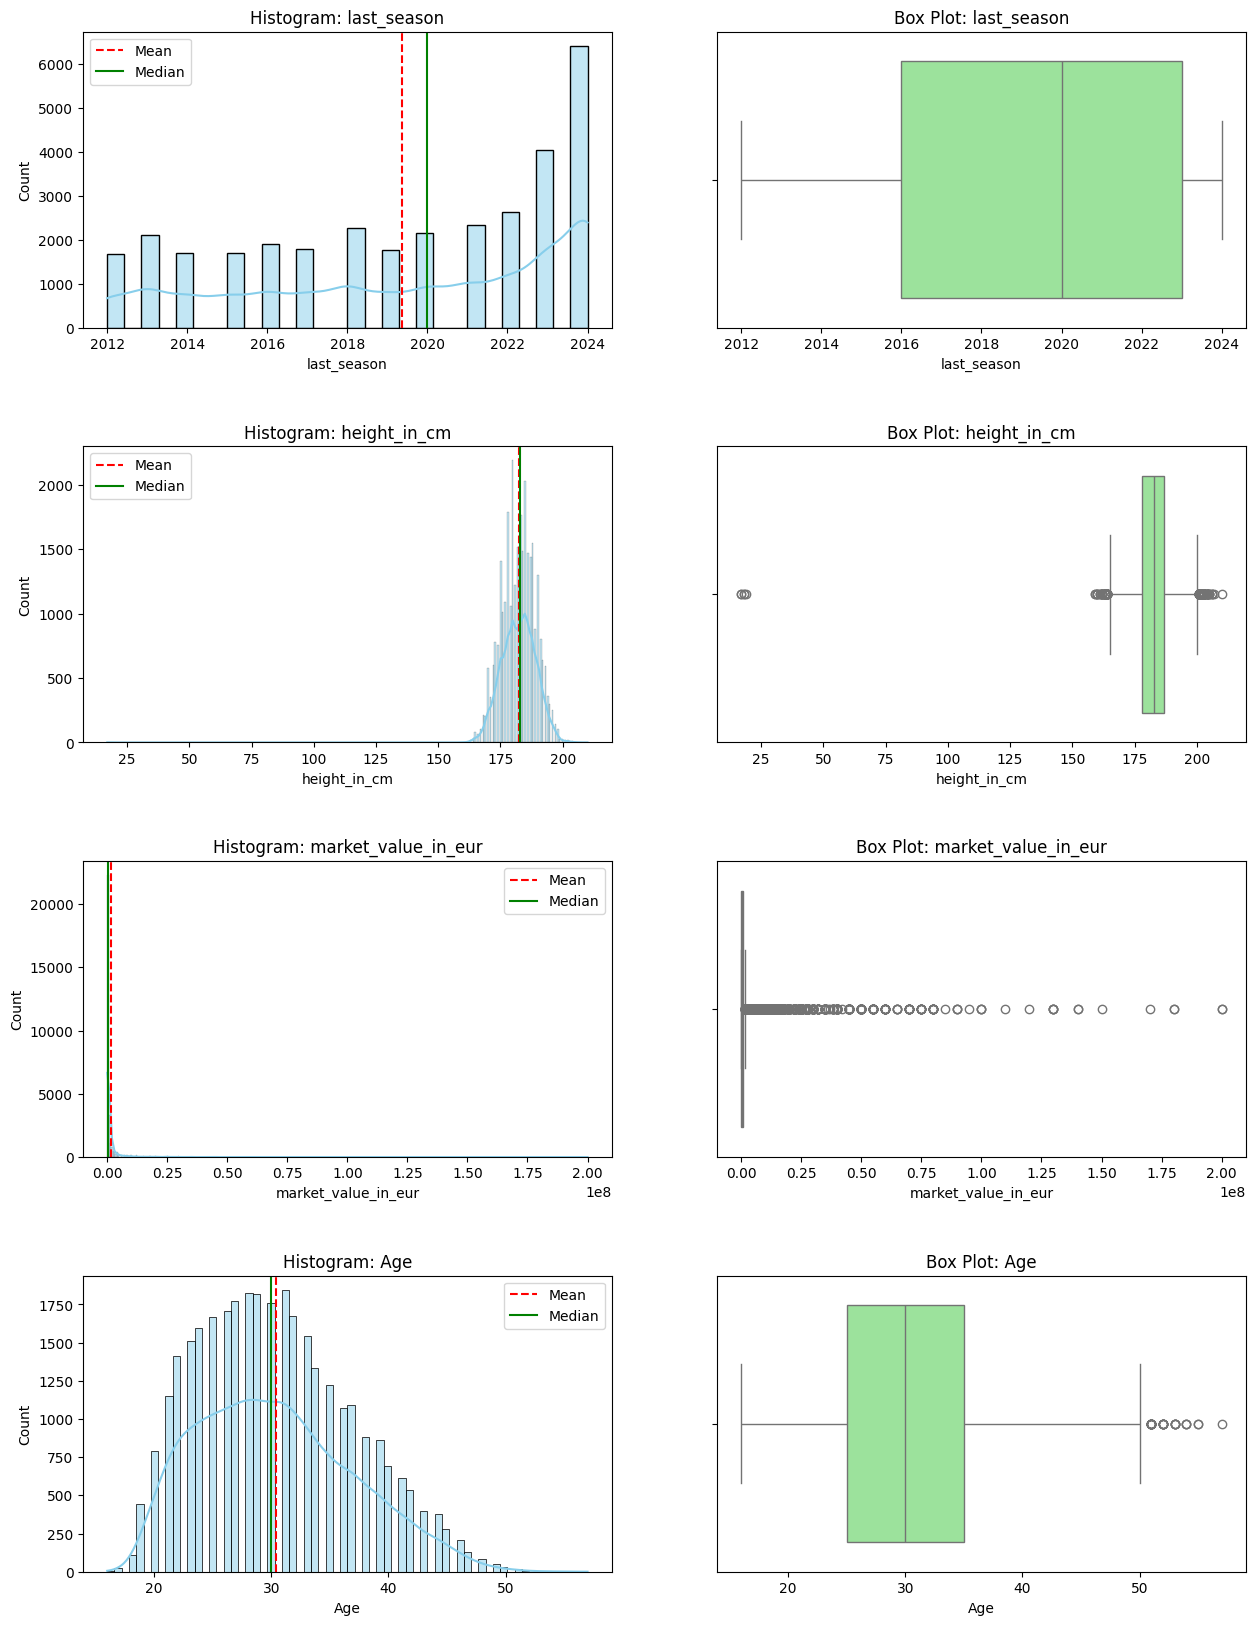

In [25]:

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4) # Khoảng cách giữa các hàng

for i, col in enumerate(numerical_cols):
    # Lấy dữ liệu (bỏ giá trị null để vẽ không bị lỗi)
    col_data = df[col].dropna()

    # 1. Vẽ Histogram (Biểu đồ phân phối)
    sns.histplot(col_data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram: {col}')
    axes[i, 0].axvline(col_data.mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(col_data.median(), color='green', linestyle='-', label='Median')
    axes[i, 0].legend()

    # 2. Vẽ Box Plot (Biểu đồ hộp)
    sns.boxplot(x=col_data, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot: {col}')

plt.show()

### 5.3: Phân tích phạm vi và outlier
Sử dụng IQR để tính toán các giá trị ngoại lai

In [32]:
for col in numerical_cols:
    col_data = df[col].dropna()
    
    # Min/Max
    min_val = col_data.min()
    max_val = col_data.max()
    
    # Tính toán IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Đếm số lượng outliers
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"\nCột: {col}")
    print(f"- Min: {min_val} | Max: {max_val}")
    print(f"- Số lượng Outliers: {num_outliers}")
    if num_outliers > 0:
        print(f"- Ví dụ vài giá trị outliers: {outliers.head(3).tolist()}")


Cột: last_season
- Min: 2012 | Max: 2024
- Số lượng Outliers: 0

Cột: height_in_cm
- Min: 17.0 | Max: 210.0
- Số lượng Outliers: 146
- Ví dụ vài giá trị outliers: [201.0, 164.0, 205.0]

Cột: market_value_in_eur
- Min: 10000.0 | Max: 200000000.0
- Số lượng Outliers: 4387
- Ví dụ vài giá trị outliers: [2000000.0, 11000000.0, 2500000.0]

Cột: Age
- Min: 16.0 | Max: 57.0
- Số lượng Outliers: 39
- Ví dụ vài giá trị outliers: [51.0, 52.0, 52.0]


### 5.4: Kiểm tra chất lượng dữ liệu
Kiểm tra xem tỷ lệ giá trị bị thiếu và những giá trị phi lý

In [34]:
print("--- Kiểm tra Chất lượng Dữ liệu ---\n")

# 1. Tỷ lệ dữ liệu bị thiếu
missing_info = df[numerical_cols].isnull().mean() * 100
print("Tỷ lệ giá trị bị thiếu (%):")
print(missing_info)

# 2. Kiểm tra các giá trị phi lý (Impossible Values)
print("\nKiểm tra Logic cụ thể:")

# Kiểm tra tuổi âm
negative_age = (df['Age'] < 0).sum()
print(f"- Số lượng tuổi âm: {negative_age}")

# Kiểm tra chiều cao vô lý
weird_height = (df['height_in_cm'] < 100).sum()
print(f"- Số lượng chiều cao < 100cm: {weird_height}")
if weird_height > 0:
    print("  -> Các giá trị chiều cao sai cụ thể:", df[df['height_in_cm'] < 100]['height_in_cm'].tolist())

# Kiểm tra giá trị thị trường âm hoặc bằng 0 
zero_market_value = (df['market_value_in_eur'] <= 0).sum()
print(f"- Số lượng giá trị thị trường <= 0: {zero_market_value}")

--- Kiểm tra Chất lượng Dữ liệu ---

Tỷ lệ giá trị bị thiếu (%):
last_season           0.00
height_in_cm          6.92
market_value_in_eur   4.67
Age                   0.14
dtype: float64

Kiểm tra Logic cụ thể:
- Số lượng tuổi âm: 0
- Số lượng chiều cao < 100cm: 5
  -> Các giá trị chiều cao sai cụ thể: [19.0, 18.0, 18.0, 17.0, 17.0]
- Số lượng giá trị thị trường <= 0: 0


### 5.5: Vẽ ma trận tương quan giữa các biến

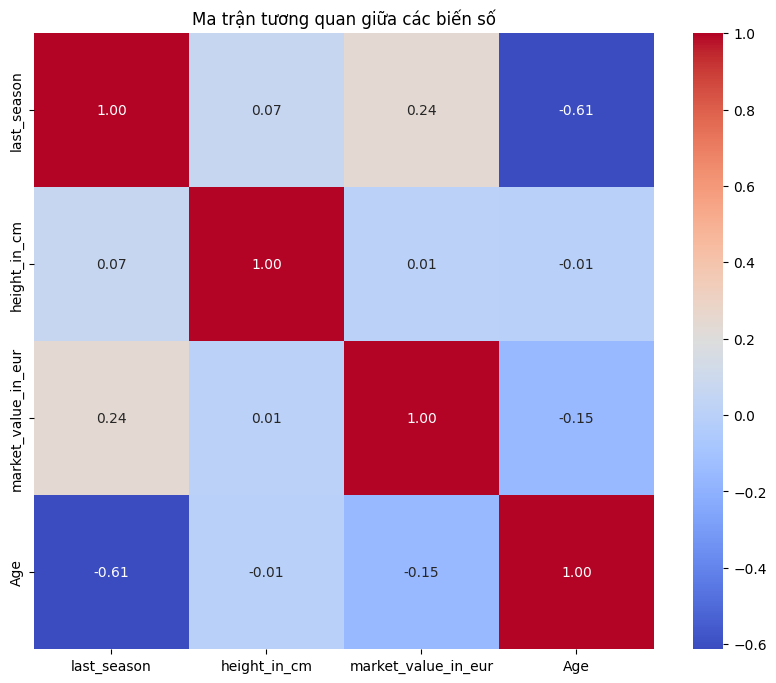

In [35]:
# Vẽ Ma trận tương quan
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

## 6. Phân tích biến phân loại

### 6.1: Phân phối giá trị
Phân tích thống kê chi tiết số lượng giá trị và các giá trị phổ biến

In [44]:
cat_cols = ['sub_position', 'foot', 'country_of_citizenship', 'agent_name', 'current_club_name', 'contract_expiration_date']

print("--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---")

for col in cat_cols:
    if col in df.columns:
        print(f"\n==================================================")
        print(f"CỘT: {col}")
        
        # 1. Đếm số lượng giá trị duy nhất (Unique)
        unique_count = df[col].nunique()
        print(f"• Số lượng giá trị duy nhất (Unique Values): {unique_count}")
        
        # 2. Liệt kê Top 10 giá trị xuất hiện nhiều nhất
        print(f"• Top 5 Giá trị phổ biến nhất:")
        # Lấy top 10 và hiển thị
        top_10 = df[col].value_counts().head(5)
        print(top_10)

--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---

CỘT: sub_position
• Số lượng giá trị duy nhất (Unique Values): 13
• Top 5 Giá trị phổ biến nhất:
sub_position
Centre-Back           5744
Centre-Forward        4578
Central Midfield      3782
Goalkeeper            3720
Defensive Midfield    2662
Name: count, dtype: int64

CỘT: foot
• Số lượng giá trị duy nhất (Unique Values): 3
• Top 5 Giá trị phổ biến nhất:
foot
right    21149
left      7530
both      1386
Name: count, dtype: int64

CỘT: country_of_citizenship
• Số lượng giá trị duy nhất (Unique Values): 183
• Top 5 Giá trị phổ biến nhất:
country_of_citizenship
Spain      1965
Italy      1887
France     1761
Brazil     1629
England    1588
Name: count, dtype: int64

CỘT: agent_name
• Số lượng giá trị duy nhất (Unique Values): 2897
• Top 5 Giá trị phổ biến nhất:
agent_name
Wasserman              504
ProStar                374
CAA Stellar            374
CAA Base Ltd           302
Unique Sports Group    257
Name: count, dtype: in

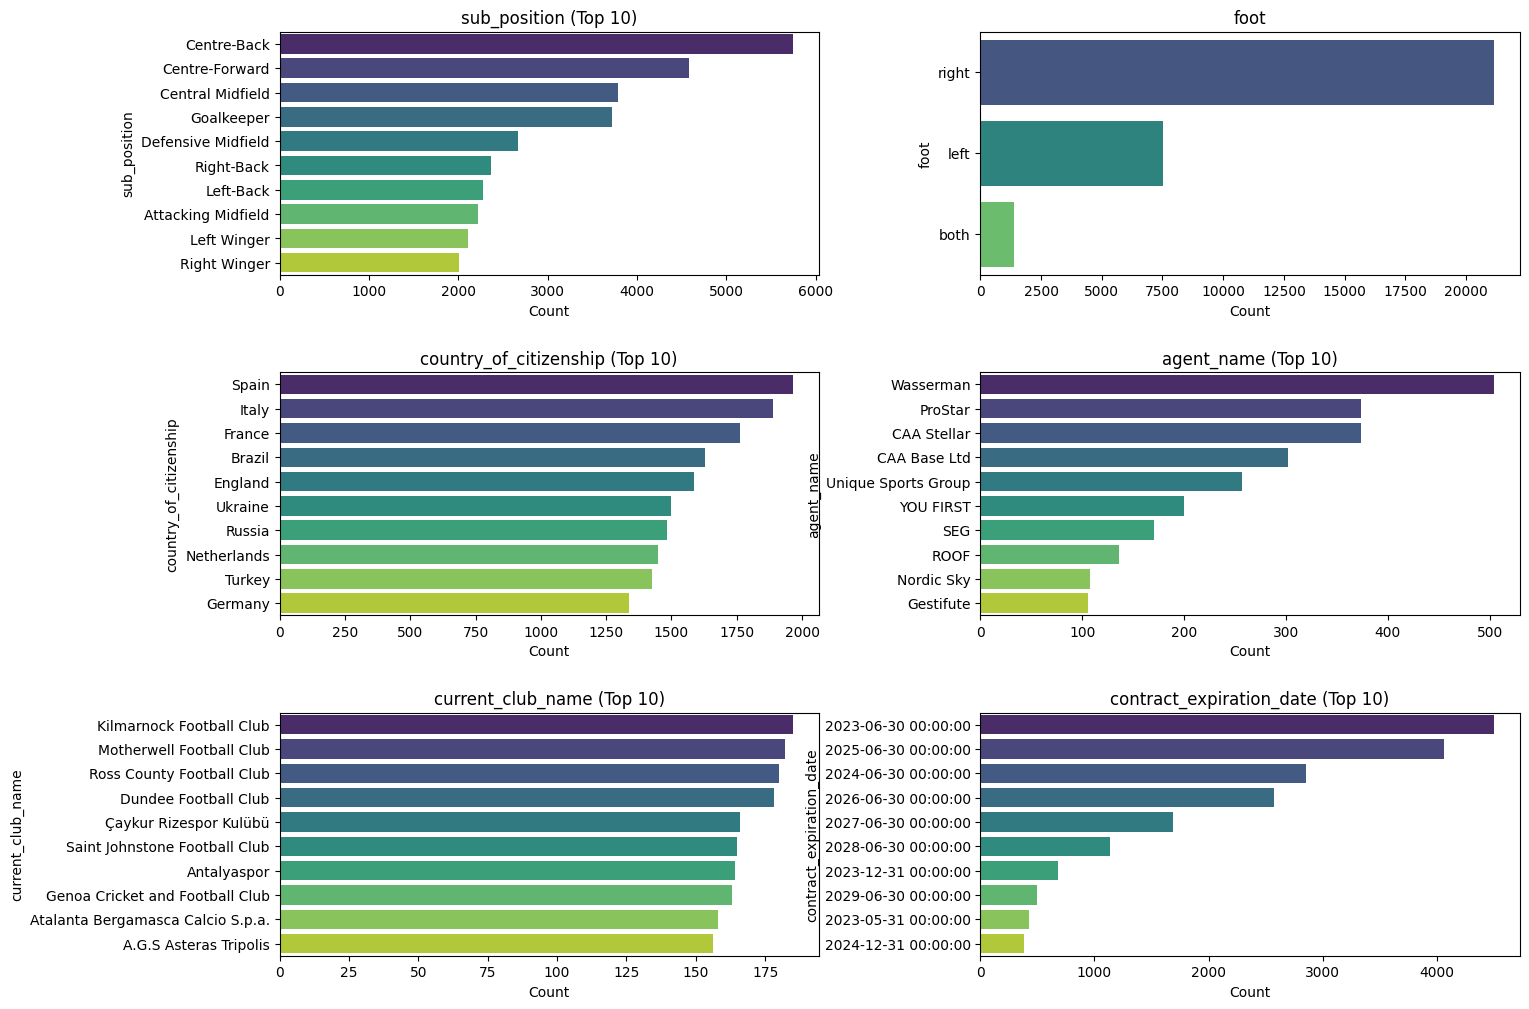

In [45]:

# 1. Visualize Distributions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    

    if len(counts) > 10:
        plot_data = counts.head(10)
        title = f'{col} (Top 10)'
    else:
        plot_data = counts
        title = col
        
    sns.barplot(
        x=plot_data.values, 
        y=plot_data.index, 
        hue=plot_data.index, 
        ax=axes[i], 
        palette='viridis', 
        legend=False          
    )
    
    axes[i].set_title(title)
    axes[i].set_xlabel('Count')

plt.show()

### 6.3. Kiểm tra chất lượng

In [49]:
print("=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===")
print(f"{'Cột':<25} | {'Missing (%)':<12} | {'Inconsistencies?':<15} | {'Abnormal?':<12} | {'Rare Categories (<1%)':<20}")
print("-" * 95)

for col in cat_cols:
    col_data = df[col]
    
    # Missing Values ---
    missing_pct = col_data.isnull().mean() * 100
    
    # Tính nhất quán
    if col_data.dtype == 'object':
        valid_vals = col_data.dropna().astype(str)
        unique_orig = valid_vals.nunique()
        unique_lower = valid_vals.str.lower().nunique()
        has_inconsistency = "YES" if unique_orig > unique_lower else "No"
    else:
        has_inconsistency = "N/A"
        
    # Giá trị bất thường
    suspicious_list = ["Missing", "missing", "Unknown", "?", "N/A", "null"]
    found_abnormal = []
    if col_data.dtype == 'object':
        for val in suspicious_list:
            if (col_data == val).any():
                found_abnormal.append(val)
    abnormal_status = ", ".join(found_abnormal) if found_abnormal else "No"

    # Phân nhóm
    counts = col_data.value_counts(normalize=True)
    rare_cats = counts[counts < 0.01]
    num_rare = len(rare_cats)
    total_cats = len(counts)
    
    grouping_suggestion = f"{num_rare}/{total_cats}"
    
    print(f"{col:<25} | {missing_pct:>10.2f}% | {has_inconsistency:<15} | {abnormal_status:<12} | {grouping_suggestion:<20}")

print("-" * 95)
print("(*) Rare Categories: Số lượng nhóm chiếm < 1% dữ liệu / Tổng số nhóm.")
print("    Không nên gom nhóm vì đây là các biến đặc biệt, gom nhóm sẽ mất đi đặc trưng")

print("\n[Chi tiết] Ví dụ về lỗi không nhất quán trong 'agent_name':")
agents = df['agent_name'].dropna().astype(str)
seen = {}
duplicates = []
for val in agents.unique():
    lower_val = val.lower()
    if lower_val in seen:
        duplicates.append(f"'{seen[lower_val]}' vs '{val}'")
    else:
        seen[lower_val] = val

if duplicates:
    print("Tìm thấy các cặp trùng lặp (khác nhau chữ hoa/thường):")
    for d in duplicates[:5]: 
        print(f" - {d}")
else:
    print("Không tìm thấy lỗi nào.")

=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===
Cột                       | Missing (%)  | Inconsistencies? | Abnormal?    | Rare Categories (<1%)
-----------------------------------------------------------------------------------------------
sub_position              |       0.55% | No              | No           | 1/13                
foot                      |       7.78% | No              | No           | 0/3                 
country_of_citizenship    |       1.17% | No              | No           | 164/183             
agent_name                |      49.14% | YES             | No           | 2890/2897           
current_club_name         |       0.00% | No              | No           | 437/437             
contract_expiration_date  |      37.09% | No              | No           | 107/119             
-----------------------------------------------------------------------------------------------
(*) Rare Categories: Số lượng nhóm chiếm < 1% dữ liệu / Tổng số nhóm.
    Không nên gom 